# Principal Component Analysis

## Import

In [ ]:
# Importing necessary libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load Dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset/Numerical/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data preprocessing

In [ ]:
s = data["Class"].value_counts()
s.iloc[1], s.iloc[0]

(492, 284315)

In [ ]:
# Feature data
# TODO: Should copy all the values in before removing Class and Time
X = data.copy()

# classification for later measurements
y = data["Class"]

# Scale all feature vectors
Std = StandardScaler()
Std.fit(X)
X = Std.transform(X)

## Apply PCA

### Training

In [ ]:
# Construstion of PCA space
"""Fits X_train in PCA model
X_train_PCA is a new representation of X_train in the principal component space."""
X_train_PCA = pca.fit_transform(X_train)

"""Converts the numpy array X_train_PCA back into a pandas DataFrame.
The index=X_train.index ensures that the new DataFrame maintains the same row indices as the original X_train"""
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

In [ ]:
# Reconstruction of original dataframe space from PCA dataframe
"""This step transforms the data back from the principal component space to
the original feature space using the inverse of the PCA transformation"""
X_train_PCA_inverse = pca.inverse_transform(X_train_PCA)

"""Converts the numpy array X_train_PCA_inverse back into a pandas DataFrame.
The index=X_train.index ensures that the new DataFrame maintains the same row
indices as the original X_train"""
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [ ]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
    tempDF = pd.concat((tempDF, yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", data=tempDF, fit_reg=False, legend=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using " + algoName)
    ax.legend(loc = "upper right")

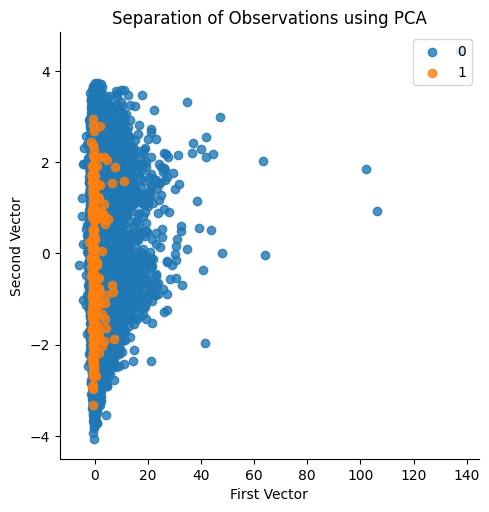

In [ ]:
scatterPlot(X_train_PCA, y_train, "PCA")

## Applying PCA with 28 components and reconstructing them

In [ ]:
# X includes the class and time
# Reducing to 2 dimensions for visualization
pca = PCA(n_components=28)

In [ ]:
X_pca = pca.fit_transform(X)

In [ ]:
# Reconstructing the dataset
X_reconstructed = pca.inverse_transform(X_pca)

## Calculate the reconstruction error and visualize them

In [ ]:
reconstruction_error = np.sum(np.square(X - X_reconstructed), axis=1)

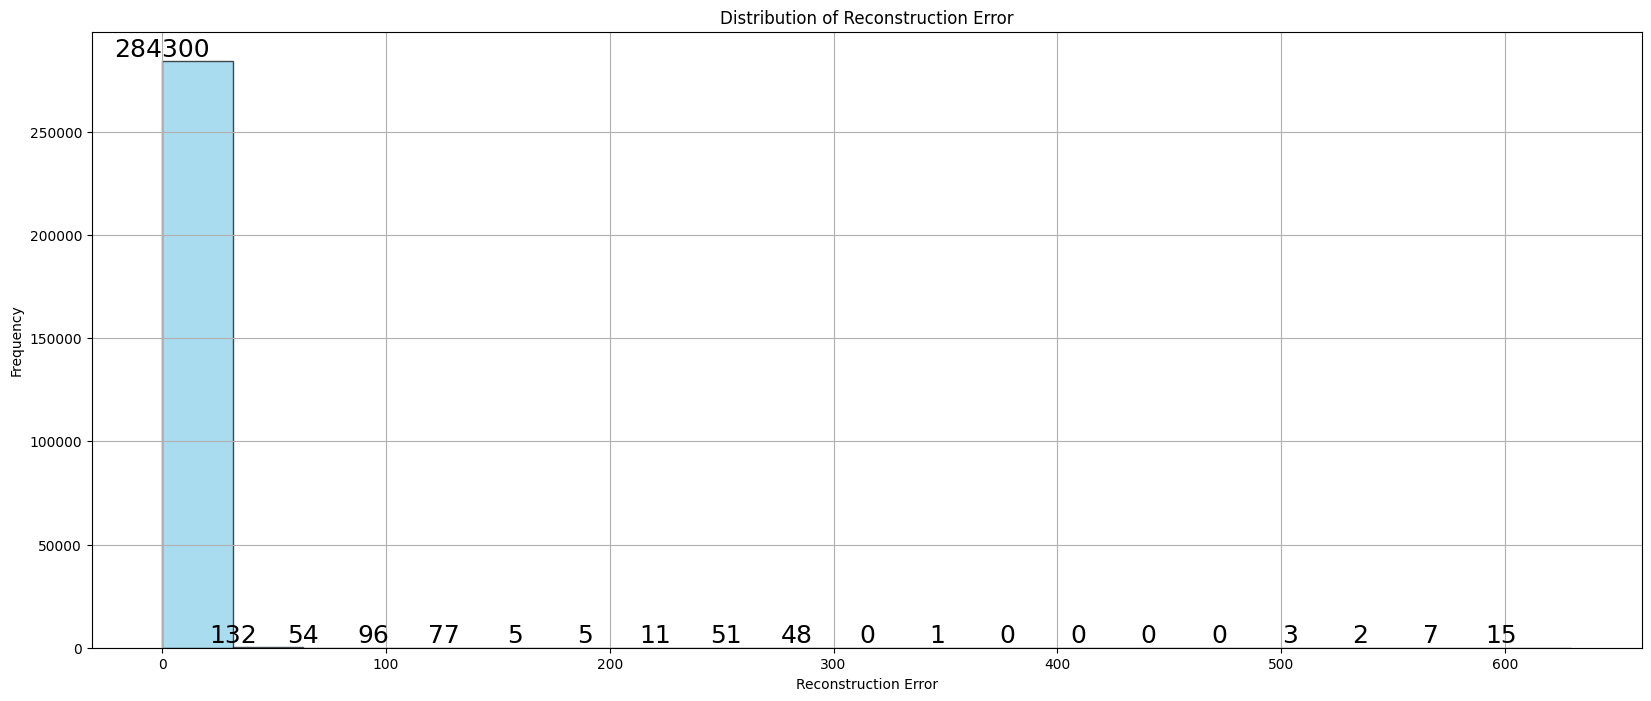

In [ ]:
# Visualizing the reconstruction error
plt.figure(figsize=(20, 8))
counts, bins, _ = plt.hist(reconstruction_error, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.title('Distribution of Reconstruction Error')
plt.grid(True)
# Annotate each bin with the count
for i in range(len(counts)):
    plt.text(bins[i], counts[i], str(int(counts[i])), ha='center', va='bottom', fontsize = 18)
plt.show()

## Finding anomalies

In [ ]:
threshold = np.percentile(reconstruction_error, 99.8)  # Adjust percentile as needed
anomalies = X[reconstruction_error > threshold]
print("Number of anomalies:", len(anomalies))
print("Anomalies:")
print(anomalies)

Number of anomalies: 570
Anomalies:
[[-1.98944439  0.25695816  0.56323015 ...  0.66645536 -0.34523322
  -0.04159898]
 [-1.98927592 -0.78178235  0.84758436 ...  0.61370982  0.46250013
  -0.04159898]
 [-1.98803351 -1.180495    1.18209005 ... -0.43406056 -0.35322939
  24.0390519 ]
 ...
 [ 1.56959742 -0.34520105  0.68210633 ...  0.58882664 -0.04181846
  24.0390519 ]
 [ 1.58254804 -1.58975021  0.35478844 ... -0.76859627  0.62630172
  24.0390519 ]
 [ 1.59059217  1.01699283  0.09597005 ... -0.04637872 -0.18319079
  24.0390519 ]]


## Evaluation of our anomalies

In [ ]:
# Identifying anomalies
anomalies_indices = np.where(reconstruction_error > threshold)[0]
anomalies_indices

array([   460,    472,    541,    623,   4920,   6329,   6331,   6334,
         6336,   6338,   6427,   6446,   6472,   6529,   6609,   6641,
         6734,   6774,   6820,   6870,   6971,   8296,   8312,   8335,
         8610,   8615,   8617,   8972,   9035,   9179,   9252,   9487,
         9509,   9643,  10204,  10456,  10484,  10497,  10498,  10568,
        10620,  10630,  10681,  10690,  10783,  10801,  10891,  10897,
        10906,  11343,  11710,  11841,  11880,  12030,  12070,  12108,
        12156,  12229,  12261,  12325,  12369,  12468,  12922,  12938,
        13394,  13405,  13499,  13617,  13624,  13725,  13833,  13942,
        14026,  14104,  14170,  14197,  14211,  14338,  14920,  15166,
        15204,  15225,  15451,  15476,  15506,  15539,  15566,  15736,
        15751,  15781,  15810,  16110,  16415,  16780,  16851,  16863,
        17317,  17322,  17366,  17407,  17453,  17480,  17592,  17916,
        18125,  18150,  18466,  18472,  18649,  18773,  18809,  19145,
      

In [ ]:
normal = 0
fraud = 0
for i in anomalies_indices:
    if data.iloc[i]["Class"] == 0:
        normal = normal + 1
    else:
        fraud = fraud + 1
print(f"Among {len(anomalies)} found {fraud} of them are actually Anomalies (TP) while {normal} are missclassified (FP)")

Among 570 found 410 of them are actually Anomalies (TP) while 160 are missclassified (FP)


In [ ]:
Precision = fraud / (normal + fraud)
Recall = fraud/s.iloc[1]

In [ ]:
print("Precession: ", Precision)
print("Recall: ", Recall)

Precession:  0.7192982456140351
Recall:  0.8333333333333334


## Summary

Inference
We have 284807 data points in our dataset, and 492 transactions are fraudulent. We consider these 492 transactions to be anomalous. Upon using Principal Component Analysis (PCA), we detected 570 records as anomalous. This is done based on reconstruction error. Of those 570 data points, 410 were actually fraudulent, i.e., True Positives and 160 were normal, i.e., False positives. With highly imbalanced data and performing unsupervised learning techniques, we got a precision of 71.92 and detected almost 83% of fraudulent transactions.

Also read: Unraveling Data Anomalies in Machine Learning

Pros of Using Principal Component Analysis (PCA) for Anomaly Detection
Dimensionality Reduction: PCA can help reduce the data’s dimensionality while retaining most of the variance. This can be useful for simplifying complex data and highlighting important features.
Noise Reduction: PCA can help reduce the impact of noise in the data by focusing on the principal components that capture the most significant variations. While low-variance features will be excluded, features with noise will have larger variance; hence, PCA helps reduce this Noise.
PCA’s Dimensionality: While anomalies can be considered noise, PCA’s dimensionality reduction and noise reduction benefits are still advantageous for anomaly detection. By reducing dimensionality, PCA simplifies data representation, aiding in identifying anomalies as deviations from normal patterns in the reduced-dimensional space. Additionally, focusing on principal components helps prioritize features capturing the most significant variations, enhancing anomaly detection sensitivity to genuine deviations amidst noise. Thus, despite anomalies being a form of noise, PCA’s capabilities optimize anomaly detection by emphasizing important features and simplifying data representation.
Visual Inspection: When reducing data to two or three dimensions (principal components), you can visualize the data and anomalies in a scatter plot, which might provide insights.
Cons of Using Principal Component Analysis (PCA) for Anomaly Detection
Computation Time: PCA involves matrix operations such as eigendecomposition or singular value decomposition (SVD), which can be computationally intensive, especially for large datasets with high dimensions. The time complexity of PCA is typically cubic or quadratic with respect to the number of features or samples, making it less scalable for very large datasets.
Memory Requirements: PCA may require storing the entire dataset and its covariance matrix in memory, which can be memory-intensive for large datasets. This can lead to issues with memory constraints, especially on systems with limited memory resources.
Linear Transformation: PCA is a linear transformation technique. PCA might not effectively distinguish if anomalies don’t exhibit linear relationships with the principal components. Example: When considering fuel cars in general there is an inverse correlation between fuels and speed. This is captured well with PCA whereas when cars become hybrid or electric there is no linear relationship between fuel and speed, in this case PCA does not capture relationships well.
Distribution Assumptions: PCA assumes that the data follows a Gaussian distribution. Anomalies can distort the distribution and impact the quality of PCA.
Threshold Selection: Defining a threshold for detecting anomalies based on the residual errors (distance between original and reconstructed data) can be subjective and challenging.
High Dimensionality Requirement: PCA tends to be more effective in high-dimensional data. When you only have a few features, other methods might work better.
Key Takeaways
By reducing the dimensionality of high-dimensional datasets, PCA simplifies data representation and highlights important features for anomaly detection
PCA can be used for highly imbalanced data, by emphasizing features that differentiate anomalies from normal instances.
Using a real-world dataset, such as credit card fraud detection, demonstrates the practical application of PCA-based anomaly detection techniques. This application showcases how PCA can be used to identify anomalies and detect fraudulent activities effectively.
Reconstruction error, calculated from the difference between original and reconstructed data points, is a metric for identifying anomalies. Higher reconstruction errors indicate potential anomalies, enabling the detection of fraudulent or abnormal behavior in the dataset.
Conclusion
PCA is more effective for local anomalies that exhibit linear relationships with the principal components of the data. It can be useful when anomalies are small deviations from the normal data’s distribution and are related to the underlying structure captured by PCA. It’s often used as a preprocessing step for anomaly detection when dealing with high-dimensional data.

For certain types of anomalies, such as those with non-linear relationships or when the anomalies are significantly different from the normal data, other techniques like isolation forests, one-class SVMs, or autoencoders might be more suitable.

In summary, while PCA can be used for anomaly detection, it’s important to consider the characteristics of your data and the types of anomalies you are trying to detect. PCA might work well in some cases but might not be the best choice for all anomaly detection scenarios